OVERVIEW

There are two types of wine; red wine and white wine. Red wine is more popular and proven that it is much healthier than the white wine because grape skins are included when red wine is fermented. White wine, on the other hand, does not use the skin of grapes according to https://www.bayridgewine.com/red-wine-versus-white-wine-which-is-healthier/. Also, red wine is more in demand than the white wine(https://today.yougov.com/topics/food/articles-reports/2019/11/05/most-popular-best-wine-poll-survey). The possible problem that might exist here is it is very easy to make a white wine look a red wine by simply putting food color and some synthetic flavors and it might affect the supply and demand of the red wine.

 DATASET DESCRIPTION


This dataset is from UCI Machine Learning Repository and uploaded to Kaggle.com (https://www.kaggle.com/rajyellow46/wine-quality). These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones).
Input variables (based on physicochemical tests):
0 - type
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
12 - quality

##  EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
#importing libraries
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### 1. Read the data

In [2]:
## Insert code here:

data = pd.read_csv('winequality.csv')


### 2. Get an overview of the dataset:

In [3]:
## Insert code here:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 3. Print the first five and last five rows of the dataset

In [4]:
## Insert code here:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 4. Find the summary statistics of the dataset

In [5]:
## Insert code here:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

In [6]:
## Insert code here:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
fixed acidity,10,0.153917
pH,9,0.138525
volatile acidity,8,0.123134
sulphates,4,0.061567
citric acid,3,0.046175
residual sugar,2,0.030783
chlorides,2,0.030783
type,0,0.000000
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000


### 6. Plot the nullity matrix and nullity correlation heatmap.

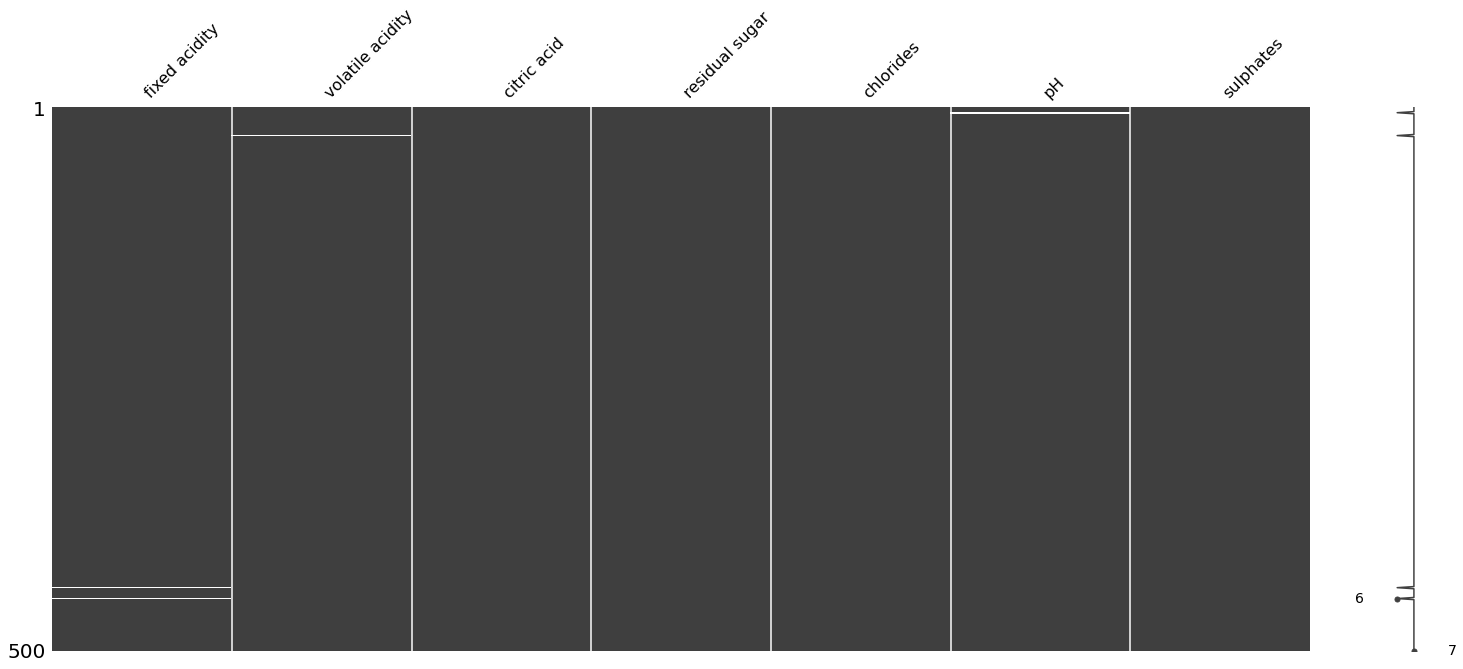

In [7]:
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns].sample(500))
plt.show()

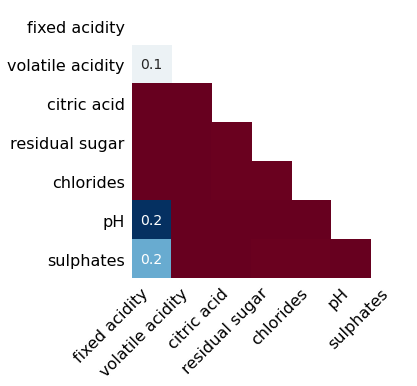

In [8]:
nullable_columns = data.columns[mask.any()].tolist()
msno.heatmap(data[nullable_columns], figsize=(5,5))
plt.show()

### 7. Delete the columns having more than 80% of values missing.

In [9]:
## Insert code here:
#there is no column with more than 80% missing values

### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation

In [10]:
## Insert code here:
data['pH']= pd.concat([data['pH'].ffill(), data['pH'].bfill()]).groupby(level=0).mean()

In [11]:
data['fixed acidity']= pd.concat([data['fixed acidity'].ffill(), data['fixed acidity'].bfill()]).groupby(level=0).mean()

In [12]:
data['volatile acidity']= pd.concat([data['volatile acidity'].ffill(), data['volatile acidity'].bfill()]).groupby(level=0).mean()

In [13]:
data['sulphates']= pd.concat([data['sulphates'].ffill(), data['sulphates'].bfill()]).groupby(level=0).mean()

In [14]:
data['citric acid']= pd.concat([data['citric acid'].ffill(), data['citric acid'].bfill()]).groupby(level=0).mean()

In [15]:
data['residual sugar']= pd.concat([data['residual sugar'].ffill(), data['residual sugar'].bfill()]).groupby(level=0).mean()

In [16]:
data['chlorides']= pd.concat([data['chlorides'].ffill(), data['chlorides'].bfill()]).groupby(level=0).mean()

In [17]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
type,0,0.0
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0


### 9. Use OneHotEncoder. Process the dataset to convert all features to numerical values. First, find the number of columns that will stay in their original form (that is, numerical features) and that need to be one-hot encoded (that is, the categorical features). Use OneHotEncoder.

In [18]:
## Insert code here:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown="ignore")

X = ohe.fit_transform(data.type.values.reshape(-1,1)).toarray()

In [19]:
data_white = []
data_red = []

for i in range(len(data)):
    data_white.append(int(X[i][0]))
    data_red.append(int(X[i][1]))
    
data["white"] = data_white
data["red"] = data_red

In [20]:
data['white'].value_counts()

0    4898
1    1599
Name: white, dtype: int64

In [21]:
data['red'].value_counts()

1    4898
0    1599
Name: red, dtype: int64

In [22]:
data = data.drop('type',axis = 1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,red
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400,9.9,6,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.665,11.2,6,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750,11.0,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710,10.2,5,1,0


### 10. Export the Cleaned Dataset.

In [23]:
## Insert code here:
data.to_csv("data_cleaned.csv")

## AI MODELLING - APPLIED CLASSIFICATION ANALYSIS (ACA) using ENSEMBLE

### 1. Import the required dependencies.

In [24]:
## Insert your code here:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings("ignore")


### 2. Read the cleaned data.

In [25]:
## Insert your code here:
cleaned_data = pd.read_csv('data_cleaned.csv')
cleaned_data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,red
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [26]:
cleaned_data = cleaned_data.iloc[: , 1:]
cleaned_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


### 3. Divide the dataset into train and validation DataFrames.



In [27]:
## Insert your code here:
from sklearn.model_selection import train_test_split
train, val = train_test_split(cleaned_data, test_size=0.2, random_state=11)

x_train = train
y_train = train['red'].values

x_val = val
y_val = val['red'].values

In [28]:
cols = list(cleaned_data.columns)
cols.pop(-1);cols.pop(-1); cols.pop(-1); cols.pop(0); 
print(cols)

['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [29]:
x = cleaned_data[cols]
y = cleaned_data['red']

In [30]:
x_temp, x_test, y_temp, y_test = train_test_split(x, y , test_size=0.2, random_state=11)

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp , test_size=0.25, random_state=11)

### 4. Construct an Ensemble model (STACKING Ensemble) using 2 base classifiers and 1 stacked model as classifier. 

NOTE: 
1. Hyperparameter Tuning: Choose a base classifier model and define the range of hyperparameter values corresponding to the model to be searched over for hyperparameter tuning. Use RandomizedSearchCV or any Hyperparameter tuning techniques. 
2. Once the tuning is complete, find the position (iteration number) at which the highest mean test score was obtained. Find the corresponding hyperparameters to be used for your based models and stacked model.
3. Split the dataset into training and validation sets and train a new model using the final hyperparameters on the training dataset. Use scikit-learn's train_test_split() method to split X and y into train and test components, with test comprising 15% of the dataset or any which can attain your target accuracy:
4. Train both your base models and stacked model using the final hyperparamters used from the hyperparameter tuning done in step 2.

# Base classifiers (knn and random forest)

In [32]:
## Insert your code here:
model_1 = knn()
param_1 = {'n_neighbors':[3,5,7,9,12,13],
          'weights':['uniform', 'distance'],
          'leaf_size':[20,30,40,50],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] 
         }

clf = GridSearchCV(
    estimator=model_1, 
    param_grid=param_1, 
    cv=10, 
    n_jobs=-1
)
clf.fit(x_train, y_train)

v_results = pd.DataFrame(clf.cv_results_)
print(v_results.shape)


(192, 22)


In [33]:
v_results = v_results.sort_values(by=['mean_test_score'],ascending=False)
v_results[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
175,0.013001,0.004492,0.125190,0.024976,brute,40,9,distance,"{'algorithm': 'brute', 'leaf_size': 40, 'n_nei...",0.928205,...,0.941026,0.953846,0.938462,0.964103,0.951157,0.953728,0.948586,0.949962,0.010768,1
31,0.012699,0.000639,0.007102,0.000541,auto,40,9,distance,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.928205,...,0.941026,0.953846,0.938462,0.964103,0.951157,0.953728,0.948586,0.949962,0.010768,1
113,0.013600,0.000916,0.006701,0.000640,kd_tree,30,7,distance,"{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_n...",0.925641,...,0.946154,0.948718,0.941026,0.961538,0.956298,0.951157,0.946015,0.949962,0.010951,1
103,0.014901,0.001514,0.008101,0.001867,kd_tree,20,9,distance,"{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_n...",0.928205,...,0.941026,0.953846,0.938462,0.964103,0.951157,0.953728,0.948586,0.949962,0.010768,1
101,0.016901,0.005560,0.006901,0.000831,kd_tree,20,7,distance,"{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_n...",0.925641,...,0.946154,0.948718,0.941026,0.961538,0.956298,0.951157,0.946015,0.949962,0.010951,1


In [34]:
print(v_results["param_algorithm"][v_results.index[0]], v_results["param_leaf_size"][v_results.index[0]])

brute 40


In [35]:
knn_params = { "algorithm":v_results["param_algorithm"][v_results.index[0]], "leaf_size":v_results["param_leaf_size"][v_results.index[0]], "n_neighbors":v_results["param_n_neighbors"][v_results.index[0]], "weights":v_results["param_weights"][v_results.index[0]]}
knn = knn(**knn_params)
knn.fit(x_train, y_train)
output_knn = knn.predict(x_val)


In [36]:
model_2 = rf()
param_2 = {    'bootstrap': [True],
        'max_depth': [10, 100, 1000],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5,6],
        'min_samples_split': [3,4,5,6],
        
}

clf = GridSearchCV(
    estimator=model_2, 
    param_grid=param_2, 
    cv=10,  
    n_jobs=-1 
)
clf.fit(x_train, y_train)

v_results = pd.DataFrame(clf.cv_results_)
print(v_results.shape)

(96, 23)


In [37]:
v_results = v_results.sort_values(by=['mean_test_score', 'std_test_score'],ascending=False)
v_results[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.488034,0.026686,0.020202,0.002600,True,10,2,3,5,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",...,0.989744,0.994872,0.994872,0.997436,0.997429,0.994859,0.997429,0.994613,0.002417,1
67,0.574141,0.065766,0.023303,0.005330,True,1000,2,3,6,"{'bootstrap': True, 'max_depth': 1000, 'max_fe...",...,0.984615,0.994872,0.994872,0.997436,0.997429,0.994859,0.994859,0.993843,0.003477,2
38,0.492336,0.034840,0.019801,0.001887,True,100,2,4,5,"{'bootstrap': True, 'max_depth': 100, 'max_fea...",...,0.984615,0.994872,0.994872,0.997436,0.994859,0.994859,0.997429,0.993586,0.003670,3
0,0.546838,0.046303,0.022804,0.002856,True,10,2,3,3,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",...,0.984615,0.994872,0.994872,0.997436,0.994859,0.994859,0.997429,0.993586,0.003486,3
33,0.460432,0.014707,0.018102,0.001514,True,100,2,3,4,"{'bootstrap': True, 'max_depth': 100, 'max_fea...",...,0.984615,0.994872,0.994872,0.997436,0.997429,0.994859,0.994859,0.993586,0.003670,5


In [38]:
rf_params = {"bootstrap":v_results["param_bootstrap"][v_results.index[0]], 'max_depth':v_results["param_max_depth"][v_results.index[0]], "min_samples_leaf":v_results["param_min_samples_leaf"][v_results.index[0]], "max_features": v_results["param_max_features"][v_results.index[0]]   }
rf = rf(**rf_params)
rf.fit(x_train, y_train)
output_rf = rf.predict(x_val)

# stack model (gaussian naive bayes)

In [39]:
x_val["knn"] = output_knn
x_val["rf"] = output_rf

x_knn = knn.predict(x_train)
x_rf = rf.predict(x_train)

x_train["knn"] = x_knn
x_train["rf"] = x_rf

In [40]:
x_train

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,knn,rf
3759,0.190,0.32,7.40,0.015,47.0,124.0,0.99278,2.99,0.39,11.0,1,1
5550,0.360,0.65,7.50,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,0,0
5525,0.600,0.29,2.20,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,0,0
6222,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,0,0
1127,0.125,0.29,5.85,0.042,24.0,99.0,0.99200,3.23,0.32,12.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5509,0.380,0.55,2.70,0.081,5.0,16.0,1.00060,2.98,0.54,9.4,0,0
3542,0.230,0.37,8.50,0.036,46.0,153.0,0.99576,3.20,0.48,9.4,1,1
1246,0.200,0.40,5.20,0.055,41.0,167.0,0.99530,3.18,0.40,10.6,1,1
1208,0.210,0.40,1.70,0.031,48.0,134.0,0.99170,3.42,0.49,11.5,1,1


In [41]:
y_train

3759    1
5550    0
5525    0
6222    0
1127    1
       ..
5509    0
3542    1
1246    1
1208    1
6121    0
Name: red, Length: 3897, dtype: int64

In [43]:
model_3 = nb()
param_3 = {'var_smoothing': np.logspace(0,-9, num=100)}

clf = GridSearchCV(
    estimator=model_3, 
    param_grid=param_3, 
    cv=10, 
    n_jobs=-1  
)
clf.fit(x_train, y_train)

v_results = pd.DataFrame(clf.cv_results_)
print(v_results.shape)

(100, 19)


In [44]:
v_results = v_results.sort_values(by=['mean_test_score', 'std_test_score'],ascending=False)
v_results[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
64,0.007303,0.000457,0.004899,0.001641,1.51991e-06,{'var_smoothing': 1.519911082952933e-06},1.0,0.997436,1.0,1.0,1.0,1.0,1.0,0.997429,1.0,1.0,0.999487,0.001027,1
65,0.007400,0.000798,0.004402,0.001113,1.23285e-06,{'var_smoothing': 1.232846739442066e-06},1.0,0.997436,1.0,1.0,1.0,1.0,1.0,0.997429,1.0,1.0,0.999487,0.001027,1
66,0.008401,0.001856,0.004199,0.000400,1e-06,{'var_smoothing': 1e-06},1.0,0.997436,1.0,1.0,1.0,1.0,1.0,0.997429,1.0,1.0,0.999487,0.001027,1
67,0.009802,0.005115,0.005200,0.001833,8.11131e-07,{'var_smoothing': 8.111308307896872e-07},1.0,0.997436,1.0,1.0,1.0,1.0,1.0,0.997429,1.0,1.0,0.999487,0.001027,1
68,0.011402,0.001495,0.006599,0.001199,6.57933e-07,{'var_smoothing': 6.579332246575682e-07},1.0,0.997436,1.0,1.0,1.0,1.0,1.0,0.997429,1.0,1.0,0.999487,0.001027,1


In [45]:
nb_params = {"var_smoothing":v_results["param_var_smoothing"][v_results.index[0]]}
nb = nb(**nb_params)
nb.fit(x_train, y_train)
output_bn = nb.predict(x_val)

### 5. Calculate the accuracy, precision, and recall for predictions on the validation set, and print the confusion matrix (Target F1-Score >= 80%):

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_curve,precision_recall_curve

In [47]:
print('knn accuracy score: ',accuracy_score(y_val,output_knn))
print('rf accuracy score: ',accuracy_score(y_val,output_rf))
print('nb accuracy score: ',accuracy_score(y_val,output_bn))

knn accuracy score:  0.943076923076923
rf accuracy score:  0.9969230769230769
nb accuracy score:  0.9707692307692307


In [48]:
print('knn precision: ',precision_score(y_val,output_knn))
print('rf precision: ',precision_score(y_val,output_rf))
print('nb precision: ',precision_score(y_val,output_bn))

knn precision:  0.9480901077375122
rf precision:  0.9959718026183283
nb precision:  0.9827411167512691


In [49]:
print('knn recall score: ',recall_score(y_val,output_knn))
print('rf recall score: ',recall_score(y_val,output_rf))
print('nb recall score: ',recall_score(y_val,output_bn))

knn recall score:  0.9787664307381193
rf recall score:  1.0
nb recall score:  0.9787664307381193


In [50]:
print('knn confusion matrix: \n',confusion_matrix(y_val,output_knn))
print('rf confusion matrix: \n',confusion_matrix(y_val,output_rf))
print('nb confusion matrix: \n',confusion_matrix(y_val,output_bn))

knn confusion matrix: 
 [[258  53]
 [ 21 968]]
rf confusion matrix: 
 [[307   4]
 [  0 989]]
nb confusion matrix: 
 [[294  17]
 [ 21 968]]


In [51]:
print('knn f1 score: ',f1_score(y_val,output_knn))
print('rf f1 score: ',f1_score(y_val,output_rf))
print('nb f1 score: ',f1_score(y_val,output_bn))

knn f1 score:  0.96318407960199
rf f1 score:  0.9979818365287589
nb f1 score:  0.9807497467071935


### 6. Plot the precision-recall curve or the AUC-ROC Curve:

<function matplotlib.pyplot.show(close=None, block=None)>

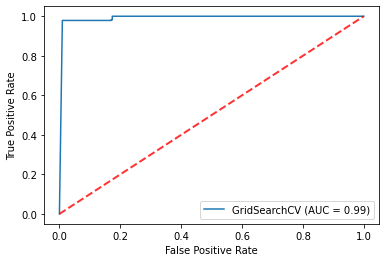

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, x_val, y_val)
plt.plot([0,1],[0,1], linestyle = 'dashed', lw = 2, color = 'r', label = 'chance', alpha = 0.8 )
plt.show

### 7. Predict the final values on the test dataset.

In [53]:
prediction = pd.DataFrame()

prediction["True Value"] = y_test
prediction["knn"] = output_knn 
prediction["rf"] = output_rf
prediction["nb"] = output_bn

prediction

,True Value,knn,rf,nb
1787,1,0,0,0
5331,0,0,0,0
1716,1,1,1,1
458,1,1,1,1
4384,1,0,0,0
...,...,...,...,...
647,1,0,0,0
3787,1,1,1,1
4098,1,0,0,0
17,1,1,1,1


### 8. Export the Final Model using PICKLE Library.

In [75]:
## Insert your code here:
import pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(clf,f)